In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

# Ref: https://stackoverflow.com/questions/48610132/
#      tensorflow-crash-with-cudnn-status-alloc-failed/53707323#53707323
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], 
  [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3096)])

2.10.1
2.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

In [3]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, 
                        padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                        

In [5]:
hist = model.fit(train_images, train_labels, batch_size=256, 
                    validation_data=(test_images, test_labels), 
                    epochs=50)

Epoch 1/50
235/235 [==============================] - 5s 6ms/step - loss: 2.3280 - accuracy: 0.1000 - val_loss: 2.3020 - val_accuracy: 0.1000
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 2.2722 - accuracy: 0.1709 - val_loss: 2.1679 - val_accuracy: 0.1910
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 1.9787 - accuracy: 0.2135 - val_loss: 1.8472 - val_accuracy: 0.2538
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 1.7406 - accuracy: 0.2846 - val_loss: 1.6565 - val_accuracy: 0.3105
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 1.5667 - accuracy: 0.3373 - val_loss: 1.5099 - val_accuracy: 0.3466
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 1.4392 - accuracy: 0.4066 - val_loss: 1.4050 - val_accuracy: 0.4546
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 1.3409 - accuracy: 0.4792 - val_loss: 1.3226 - val_accuracy: 0.4937
Epoch 

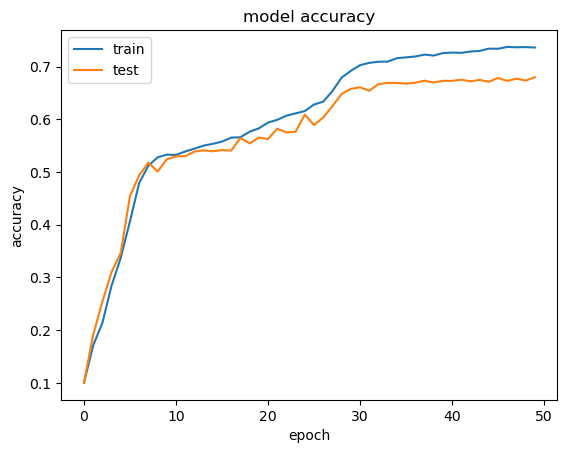

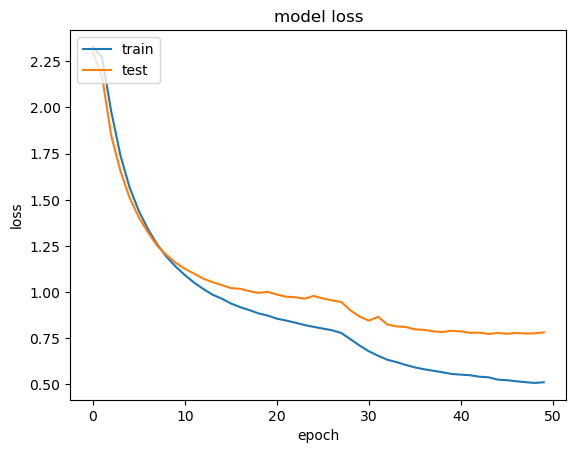

[[[1.10227346 1.70456 -0.0306068715 ... 0.360965073 -0.956786 -0.0598055609]
 [-1.91054845 0.0630096868 -0.515178502 ... 1.53651822 0.935797513 1.34753764]
 [0.959130824 0.836393058 -5.40217209 ... 2.17352653 1.088 2.22820926]
 ...
 [-0.29170835 1.40602279 0.302919 ... -6.95204592 1.9487462 -7.31353331]
 [-0.437303871 1.43446243 0.353617 ... -5.22025919 -4.94530916 -4.96543646]
 [1.72805285 -3.84099746 0.14903827 ... 0.289089799 0.0831442624 0.993908823]]]


In [12]:
# plot accuracy history
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# print(model.trainable_variables)
# ต้องดูว่า layer นั้นๆมี path เป็นอะไรและแก้ไข path ให้ตรงกับเลเยอร์ที่เราต้องการ
# ตอนนี้เลเยอร์สุดท้ายคือ <KerasVariable shape=(10,), dtype=float32, path=sequential_1/dense_8/bias>
# var = [v for v in model.trainable_variables if v.name == "dense/kernel:0"]
var = [v for v in model.trainable_variables if v.name == "dense_6/kernel:0"]
tf.print(var)

In [13]:
predictions = model.predict(test_images)
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

313/313 [==============================] - 1s 1ms/step


In [14]:
predictions[12]

array([1.0079637e-03, 6.1289764e-05, 1.6621024e-04, 1.3454111e-02,
       9.0741832e-04, 2.4544846e-04, 6.5074564e-04, 1.0643117e-02,
       9.6505332e-01, 7.8104408e-03], dtype=float32)

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

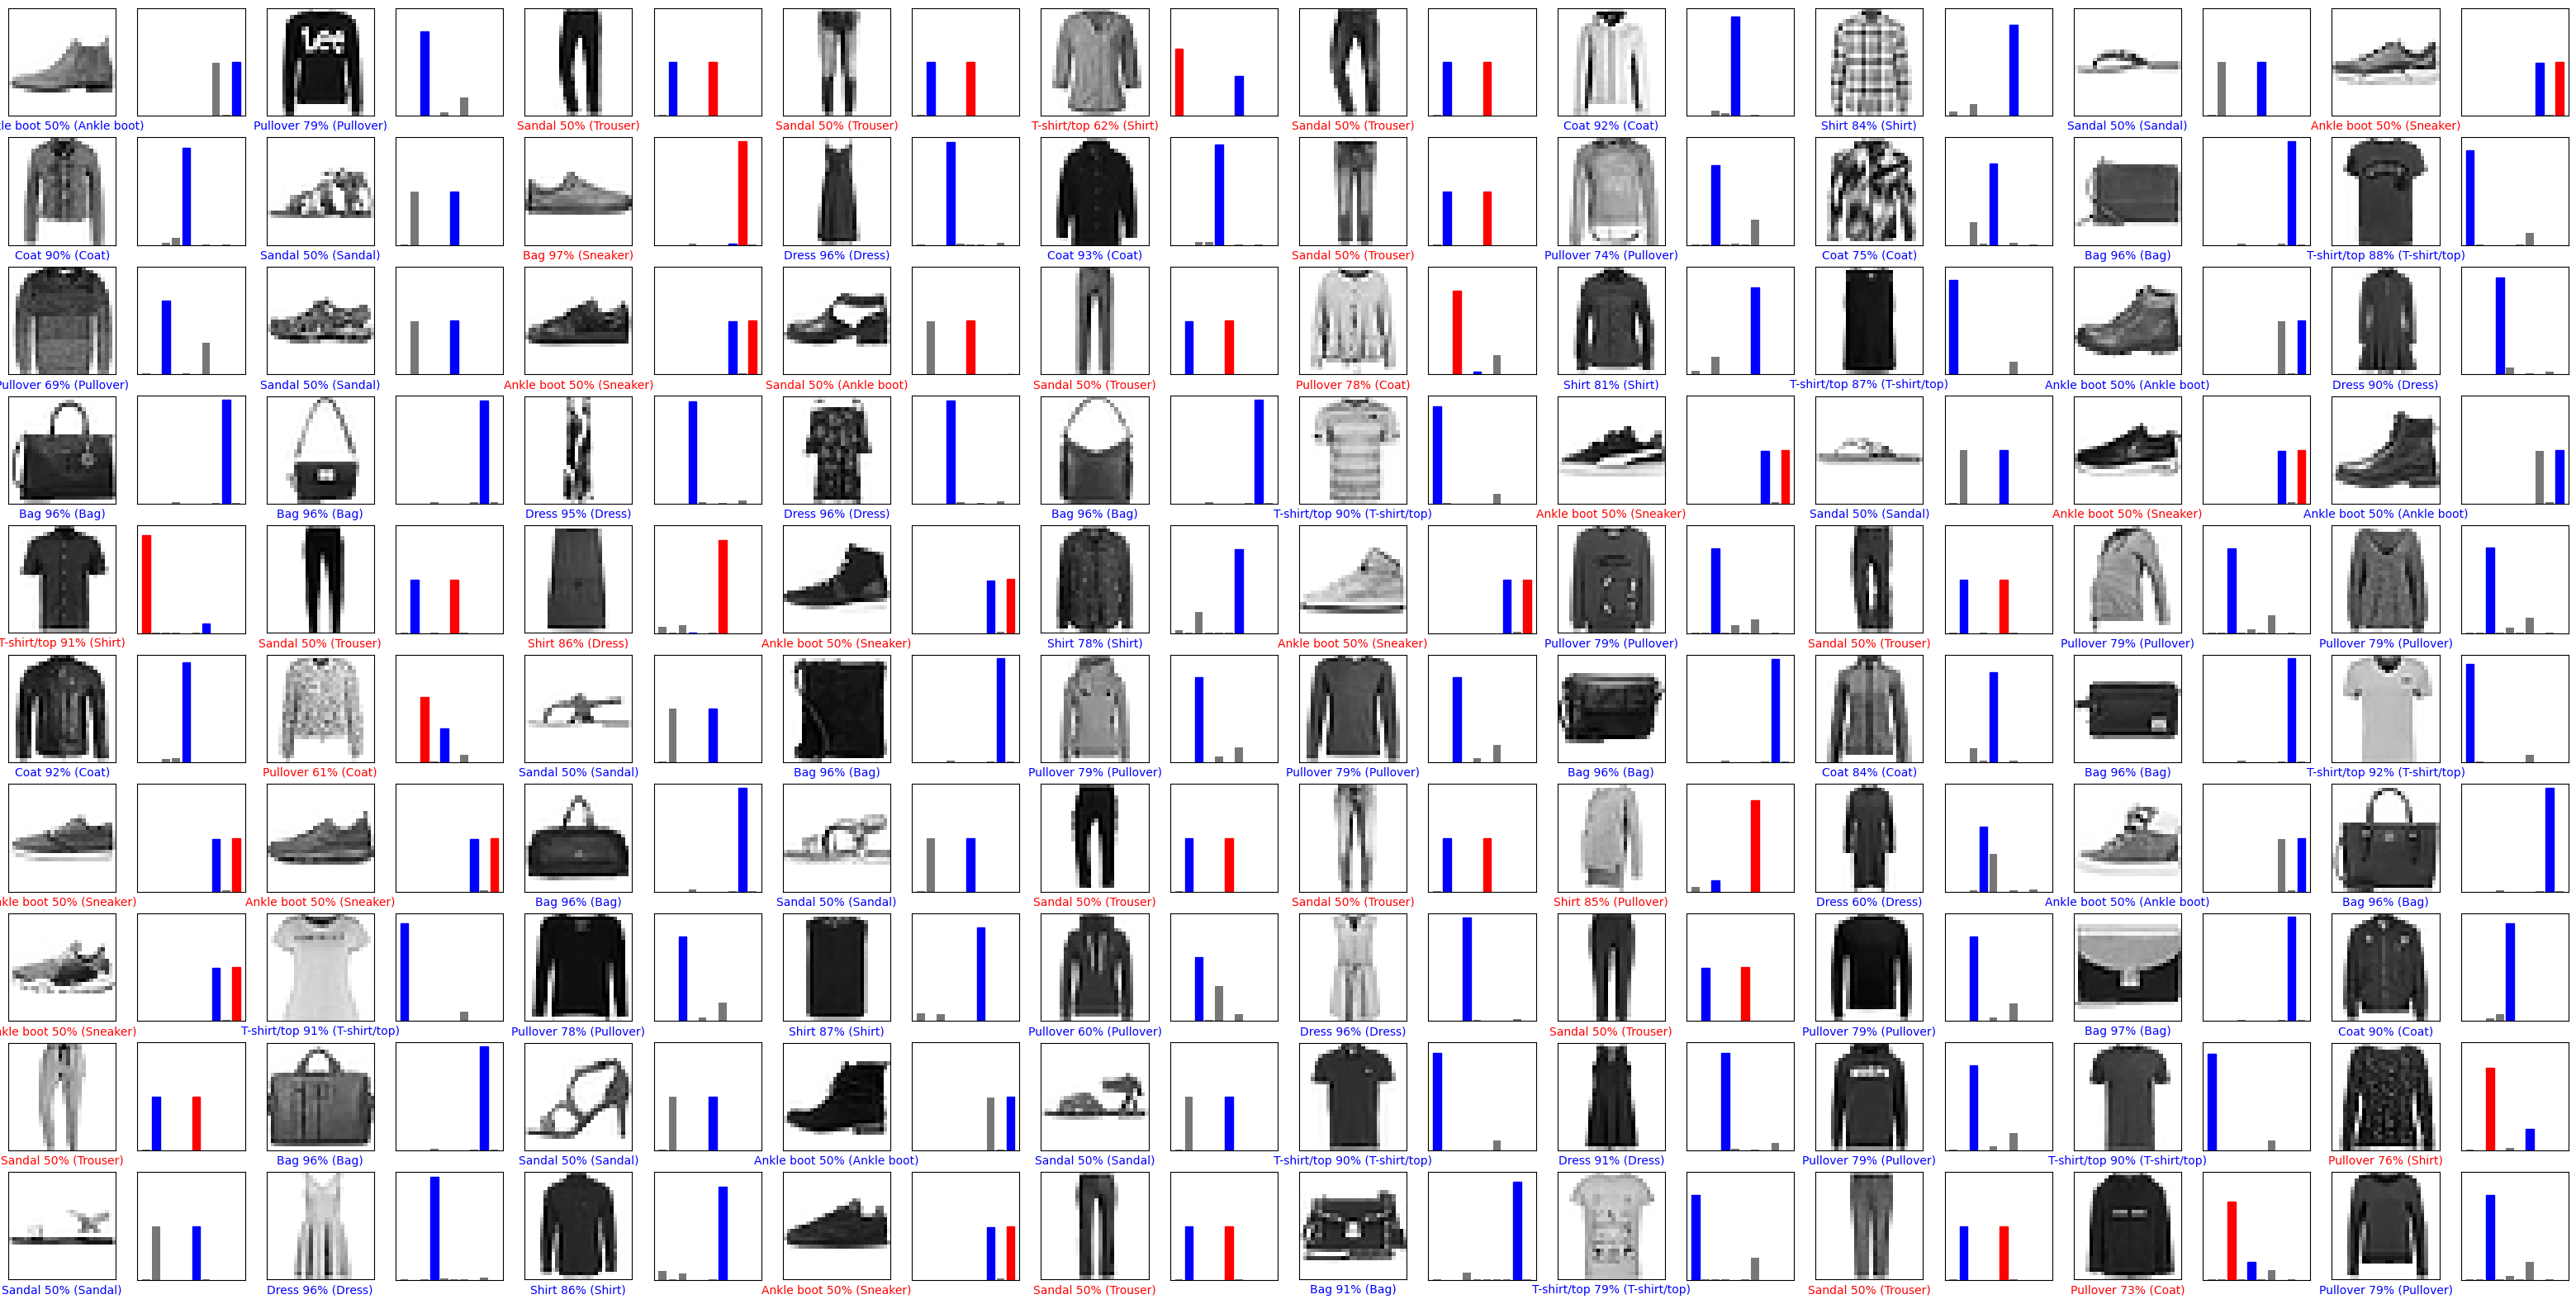

In [16]:
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)